# How to use this repository for Exceptional Preferences Mining

Author : Charles Gaydon

February 2018

______

Few steps are necesary to use this repository ! 

(More details about the approach can be found in the second notebook.)

## 0. Import packages and functions

In [9]:
# imports basic packages
import pandas as pd
import numpy as np
np.random.seed(0)

# import the beam search and preference matrix (PM) functions
from beam_search import *
from preference_matrix import *

## 1. Import your data

In [17]:
Udata = pd.read_csv("sushi3-2016/forEPM.sushi3.udata", sep = " ", dtype=str) #dtype is important
Udata.head(5)

,gender,age,EWID,eqprefs,velocity
0,0,2,0,0,2
1,1,1,1,0,0
2,1,2,1,1,2
3,0,4,1,1,2
4,1,1,1,1,2


In [18]:
Rdata = pd.read_csv("sushi3-2016/forEPM.sushi3a.5000.10.order", sep = " ")
Rdata.head(5)

,ebi,anago,maguro,ika,uni,ikura,tamago,toro,tekka_maki,kappa_maki
0,2,8,10,3,4,1,5,9,7,6
1,1,8,6,4,10,9,3,5,7,2
2,2,8,3,4,6,7,10,1,5,9
3,4,7,5,6,1,2,8,3,9,10
4,4,10,7,5,9,3,2,8,1,6


## 2. Compute the global PM

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.7 µs


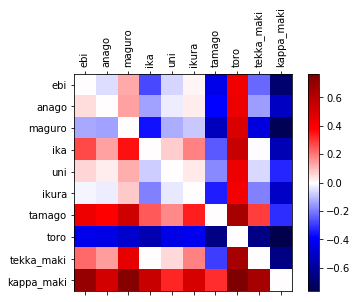

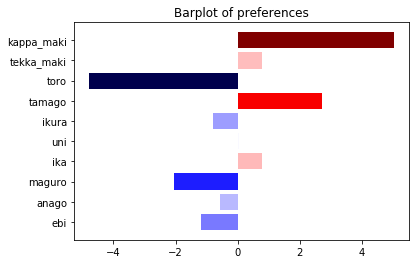

In [19]:
%time #really fast !
PM_5000 = compute_PM(Rdata.values)
display_PM(PM_5000, Rdata.columns.tolist()) 

## 3. Write the score function and run the algorithm

In [22]:
get_PM_score = lambda ranks : compute_PM_score(ranks, PM_5000, Rdata.shape[1],method = "Norm")
b, b_str = beam_search(Udata, Rdata, 5, max_iter = 50,verbose = True, score_function = get_PM_score)

[velocity = 1] -> 2.11
new beam = ['', '', '', '', '[velocity = 1]']
[gender = 0] -> 10.77
new beam = ['', '', '', '[velocity = 1]', '[gender = 0]']
[EWID = 0] -> 5.04
new beam = ['', '', '[velocity = 1]', '[EWID = 0]', '[gender = 0]']
[age = 0] -> 11.28
new beam = ['', '[velocity = 1]', '[EWID = 0]', '[gender = 0]', '[age = 0]']
[age = 1] -> 7.62
new beam = ['[velocity = 1]', '[EWID = 0]', '[age = 1]', '[gender = 0]', '[age = 0]']
[velocity = 0] -> 3.98
new beam = ['[velocity = 0]', '[EWID = 0]', '[age = 1]', '[gender = 0]', '[age = 0]']
[age = 3] -> 7.71
new beam = ['[EWID = 0]', '[age = 1]', '[age = 3]', '[gender = 0]', '[age = 0]']
[age = 5] -> 6.8
new beam = ['[age = 5]', '[age = 1]', '[age = 3]', '[gender = 0]', '[age = 0]']
[EWID = 1] -> 6.9
new beam = ['[EWID = 1]', '[age = 1]', '[age = 3]', '[gender = 0]', '[age = 0]']
[eqprefs = 1] -> 5.6
[age = 4] -> 7.57
new beam = ['[age = 4]', '[age = 1]', '[age = 3]', '[gender = 0]', '[age = 0]']
[age > 3] -> 9.29
new beam = ['[age = 1]'

## 4. Display the PM differences to the population of the n best subgroups found

PM #0 is obtained with rule : 
[gender = 1] & [age < 2] and score :12.117384547
PM differences are as follow :


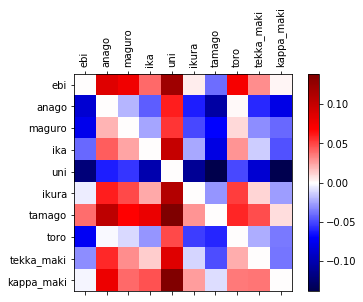

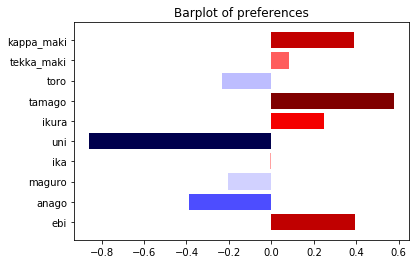

PM #1 is obtained with rule : 
[age < 2] & [gender = 1] and score :12.117384547
PM differences are as follow :


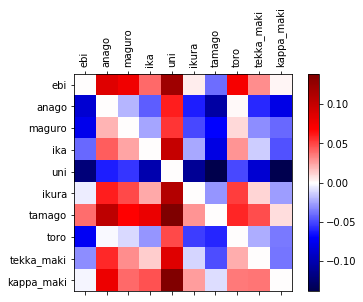

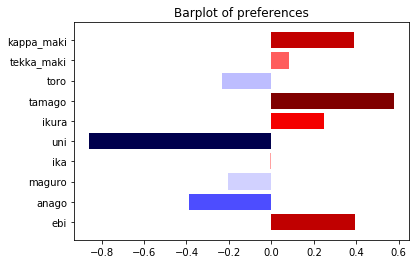

PM #2 is obtained with rule : 
[gender = 1] & [age < 3] and score :11.5262741814
PM differences are as follow :


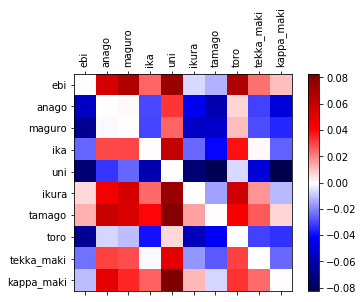

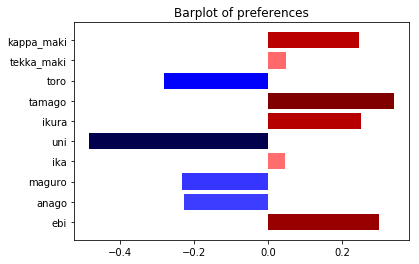

PM #3 is obtained with rule : 
[age = 0] and score :11.2789842596
PM differences are as follow :


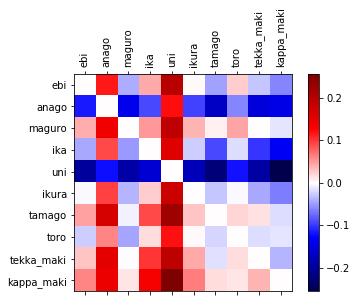

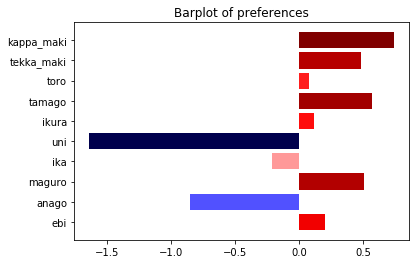

In [25]:
display_best_PM(b, Udata, Rdata, Rdata.columns.tolist(), n=4, relative = True)

## 5. Use your own dataset !
You can use your own dataset with the structure defined in the DOCUMENTATION of the functions.

In [31]:
help(beam_search)
# beam_search?

Help on function beam_search in module beam_search:

beam_search(Udata, Rdata, beam_width, max_iter=50, verbose=False, score_function=<function naive_score_function at 0x7faa2a55d6a8>)
    Run the beam search algo to find subgroups of high score
    Input :
        - Udata : a (n,p) pandas DataFrame, each line represents a subject
        - Rdata : a (n,w) pandas DataFrame, each line represents the ranks given by the subject
            value (i,j) is the rank given by subject i to item j. 
            Ranks should be integer between 1 and w (= nb of items)
        - beam_width : the size of the set of condition to update
        - max_iter : iterations stop at max_iter OR before when there is no change in the beam
        - verbose : set to True to display intermediate results and beam.
        - score_function : receives a (n',w) numpy array of ranks (n'<=n) to compute the score.



OVER : 24/02/2018